# Prétraitement de donnée

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [2]:
pd.options.display.float_format = "{:.2f}".format

### 1 - Chargez le fichier ```dataset.csv```

In [3]:
df = pd.read_csv("data_LSI2/dataset.csv")
df

,City,Age,Salary,Maried
0,Paris,NaN,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,NaN,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 2 - Remplacez les données manquantes par la moyenne de la caractéristique pour la colonne Age : Cette technique est la meilleure façon à ce jour de traiter les valeurs manquantes. De nombreux statisticiens utilisent cette technique.

In [4]:
df.Age.replace(to_replace = np.nan, value = df.Age.mean(), inplace = True)
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 3 - Remplacez les données manquantes de la colonne Salary par la mediane de la caractéritique

In [5]:
df.Salary.replace(to_replace = np.nan, value = df.Salary.median(), inplace = True)
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,59500.00,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,59500.00,No
9,New York,37.00,67000.00,Yes


### 4 - Encodez la colonne City en utilisant les nombres entiers 0, 1 et 2. 

In [6]:
df.City = df.City.astype('category').cat.codes

In [7]:
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,No
1,3,27.00,48000.00,Yes
2,0,50.00,54000.00,No
3,2,38.00,61000.00,No
4,1,40.00,59500.00,Yes
5,4,35.00,58000.00,Yes
6,5,35.38,52000.00,No
7,0,21.00,79000.00,Yes
8,4,35.00,59500.00,No
9,3,37.00,67000.00,Yes


### 5 - Faites de même pour la colonne Maried

In [8]:
df.Maried = df.Maried.astype('category').cat.codes

In [9]:
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,0
1,3,27.00,48000.00,1
2,0,50.00,54000.00,0
3,2,38.00,61000.00,0
4,1,40.00,59500.00,1
5,4,35.00,58000.00,1
6,5,35.38,52000.00,0
7,0,21.00,79000.00,1
8,4,35.00,59500.00,0
9,3,37.00,67000.00,1


Dans l'apprentissage automatique, nous divisons les données en deux parties :

L'ensemble d'apprentissage : La partie des données sur laquelle nous mettons en œuvre notre modèle d'apprentissage automatique. Ensemble de test : La partie des données sur laquelle nous évaluons les performances de notre modèle d'apprentissage automatique. La raison pour laquelle nous divisons ces données est de nous assurer que notre modèle d'apprentissage automatique ne surapprend pas la corrélation des données sur lesquelles il est formé. Si nous le laissons trop apprendre sur les données, ses performances risquent d'être médiocres lorsqu'il est testé sur un nouvel ensemble de données avec une corrélation différente.

Par conséquent, lorsque nous construisons un modèle d'apprentissage automatique, l'idée est de le mettre en œuvre sur l'ensemble d'apprentissage et de l'évaluer sur l'ensemble de test. Nous nous attendons à ce que les performances de l'ensemble d'apprentissage et de l'ensemble de test soient différentes et, si c'est le cas, le modèle peut s'adapter à de nouveaux ensembles de données.

### 6 - Divisez l'ensemble de données en ensembles de formation et de test.

In [10]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
training_set

,City,Age,Salary,Maried
5,4,35.00,58000.00,1
0,4,35.38,72000.00,0
7,0,21.00,79000.00,1
2,0,50.00,54000.00,0
9,3,37.00,67000.00,1
4,1,40.00,59500.00,1
3,2,38.00,61000.00,0
6,5,35.38,52000.00,0


In [12]:
test_set

,City,Age,Salary,Maried
8,4,35.00,59500.00,0
1,3,27.00,48000.00,1


### 7 - Mettez à l'échelle séparément l'ensemble d'entraînement et l'ensemble de test de notre jeu de données.

In [13]:
for column in training_set.columns:
  if column in ['Age',  'Salary']:
    training_set[column] = (training_set[column] - training_set[column].mean()) / training_set[column].std()

In [14]:
training_set

,City,Age,Salary,Maried
5,4,-0.18,-0.52,1
0,4,-0.14,1.00,0
7,0,-1.95,1.75,1
2,0,1.70,-0.96,0
9,3,0.07,0.45,1
4,1,0.44,-0.36,1
3,2,0.19,-0.20,0
6,5,-0.14,-1.17,0


In [15]:
for column in test_set.columns:
  if column in ['Age',  'Salary']:
    test_set[column] = (test_set[column] - test_set[column].mean()) / test_set[column].std()

In [16]:
test_set

,City,Age,Salary,Maried
8,4,0.71,0.71,0
1,3,-0.71,-0.71,1


### Afficher un graphique

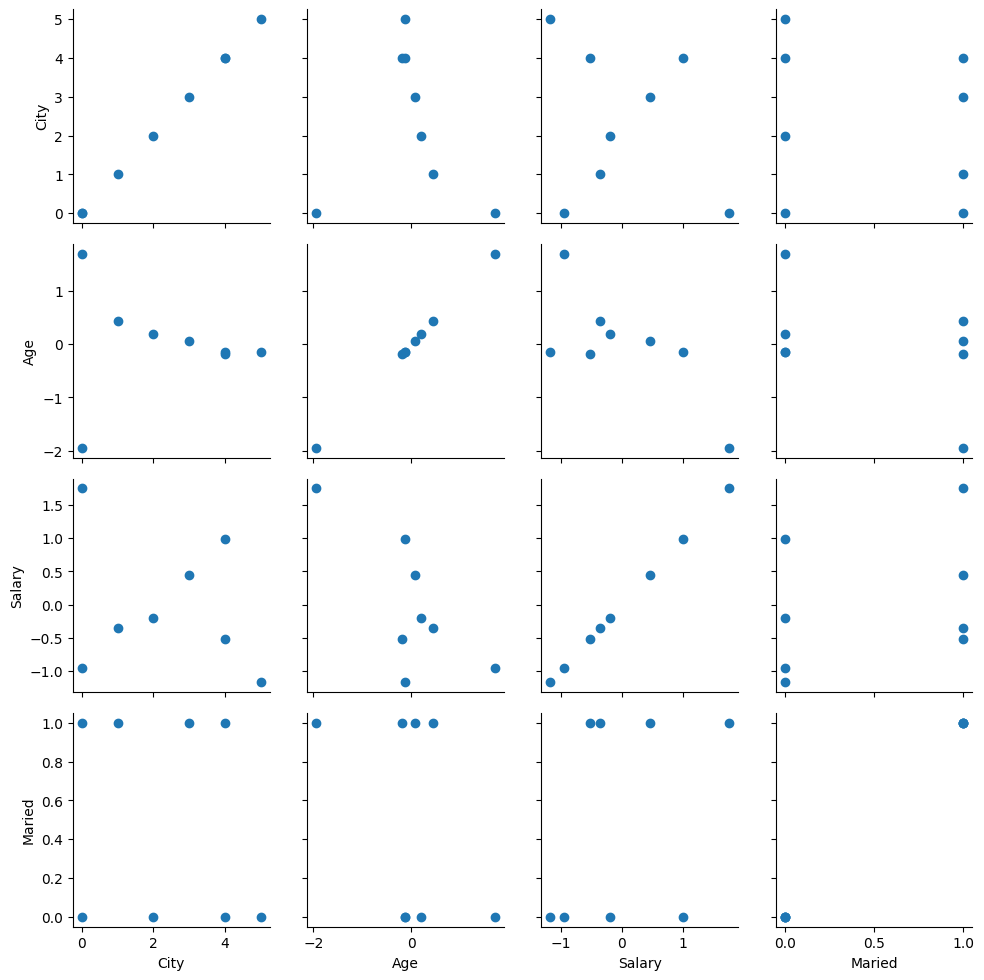

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# A completer
sns.axisgrid.PairGrid(training_set, vars=['City', 'Age', 'Salary', 'Maried']).map(plt.scatter)
plt.show()

# Régression linéaire simple

### 1. Nous allons utiliser le jeu de données Tips

In [18]:
import pandas as pd
import numpy as np

Tips = pd.read_csv("data_LSI2/Tips.csv")


### 2 - Afficher la taille du dataframe

In [19]:
Tips.shape

(244, 7)

### 3 - Divisez l'ensemble de données en sous-ensembles de formation et de test en utilisant seulement deux variables : tip et total_bill.

In [20]:
subset = Tips[['tip', 'total_bill']]

training_set, test_set = train_test_split(subset, test_size=0.2, random_state=42)

In [21]:
#Train
training_set

,tip,total_bill
228,2.72,13.28
208,2.03,24.27
96,4.00,27.28
167,4.50,31.71
84,2.03,15.98
...,...,...
106,4.06,20.49
14,3.02,14.83
92,1.00,5.75
179,3.55,34.63


In [22]:
#Test
test_set

,tip,total_bill
24,3.18,19.82
6,2.00,8.77
153,2.00,24.55
211,5.16,25.89
198,2.00,13.00
176,2.00,17.89
192,2.56,28.44
124,2.52,12.48
9,3.23,14.78
101,3.00,15.38


### 4 - Vérifier la linéarité entre les caractéristiques "total_bill" et "tip".

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

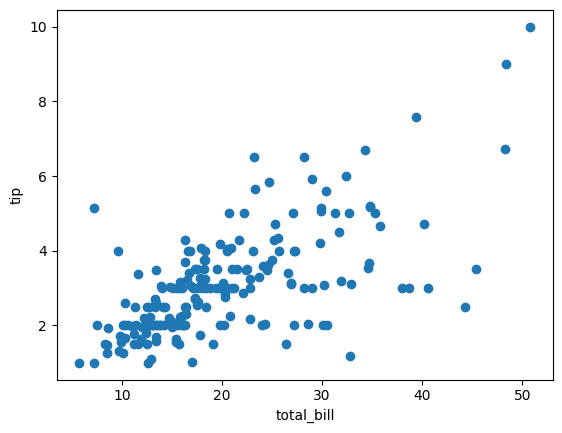

In [24]:
plt.scatter(training_set['total_bill'], training_set['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

### 5 - D'après le graphique, nous voyons que la relation est à peu près linéaire. Essayez une transformation de notre variable explicative total_bill en utilisant la fonction logarithmique.

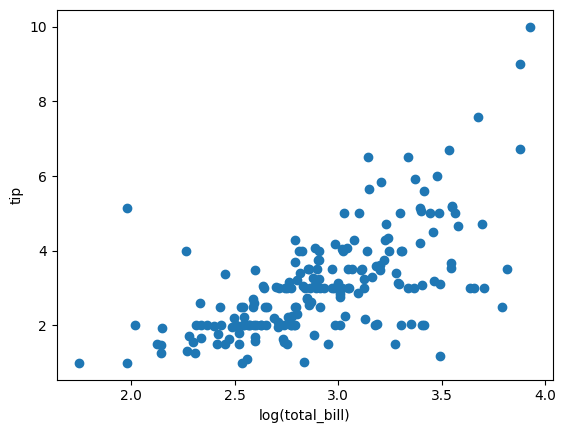

In [25]:
plt.scatter(np.log(training_set['total_bill']), training_set['tip'])
plt.xlabel('log(total_bill)')
plt.ylabel('tip')
plt.show()
#Quelle est votre conclusion ?

### 6 - Exécutez le modèle de régression linéaire en utilisant la transformation logarithmique.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()

regr.fit(np.log(training_set[['total_bill']]), training_set['tip'])

print('Coefficient :', regr.coef_)
print('Intercept :', regr.intercept_)


Coefficient : [2.16543672]
Intercept : -3.2335550531563992


### 7 - Tracez le modèle de régression obtenu.

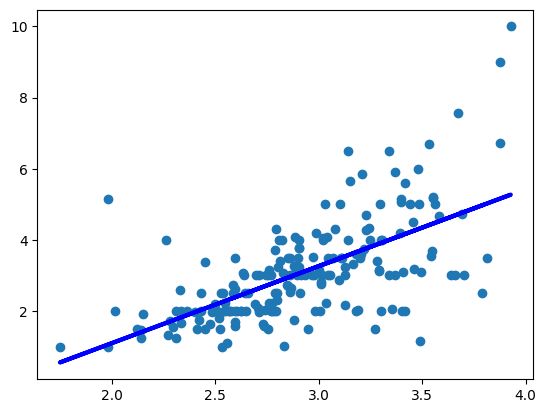

In [27]:
plt.scatter(np.log(training_set['total_bill']), training_set['tip'])
plt.plot(np.log(training_set['total_bill']), regr.predict(np.log(training_set[['total_bill']])), color='blue', linewidth=3)
plt.show()

### 8 - Faites la prédiction sur le test set et calculer la MSE

In [28]:
y_pred = regr.predict(np.log(test_set[['total_bill']]))
print(mean_squared_error(test_set['tip'], y_pred))

0.6073286138948184


### Linear Regression uning statmodels

In [29]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(np.log(training_set["total_bill"]))
#fit linear regression model
model = sm.OLS(training_set["tip"], x).fit()

In [30]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.54e-23
Time:                        12:36:25   Log-Likelihood:                -295.68
No. Observations:                 195   AIC:                             595.4
Df Residuals:                     193   BIC:                             601.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2336      0.561     -5.768      0.0

# Régression linéaire multiple

Le jeu de données Auto MPG

In [31]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.00,4,140.00,86.00,2790.00,15.60,82,1
394,44.00,4,97.00,52.00,2130.00,24.60,82,2
395,32.00,4,135.00,84.00,2295.00,11.60,82,1
396,28.00,4,120.00,79.00,2625.00,18.60,82,1
397,31.00,4,119.00,82.00,2720.00,19.40,82,1


## Nettoyer les données

### 1 - lsiter les données ayant des valeurs manquants

In [32]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 2 - Supprimez les lignes contenant des NAN

In [33]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 3 - Encodez la colonne Origine en utilisant les nombres entiers 1: USA, 2: Europe et 3: Japan. 

In [34]:
dataset.Origin = dataset.Origin.map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.00,8,307.00,130.00,3504.00,12.00,70,USA
1,15.00,8,350.00,165.00,3693.00,11.50,70,USA
2,18.00,8,318.00,150.00,3436.00,11.00,70,USA
3,16.00,8,304.00,150.00,3433.00,12.00,70,USA
4,17.00,8,302.00,140.00,3449.00,10.50,70,USA
...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790.00,15.60,82,USA
394,44.00,4,97.00,52.00,2130.00,24.60,82,Europe
395,32.00,4,135.00,84.00,2295.00,11.60,82,USA
396,28.00,4,120.00,79.00,2625.00,18.60,82,USA


### 4 - Encoder (hot encoding) les valeurs de la colonne Origine avec ```.get_dummies```.

In [35]:
dummies = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dummies

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.00,8,307.00,130.00,3504.00,12.00,70,0,0,1
1,15.00,8,350.00,165.00,3693.00,11.50,70,0,0,1
2,18.00,8,318.00,150.00,3436.00,11.00,70,0,0,1
3,16.00,8,304.00,150.00,3433.00,12.00,70,0,0,1
4,17.00,8,302.00,140.00,3449.00,10.50,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790.00,15.60,82,0,0,1
394,44.00,4,97.00,52.00,2130.00,24.60,82,1,0,0
395,32.00,4,135.00,84.00,2295.00,11.60,82,0,0,1
396,28.00,4,120.00,79.00,2625.00,18.60,82,0,0,1


### 5 - Diviser les données en ensembles d'apprentissage et de test

In [36]:
training_set, test_set = train_test_split(dummies, test_size=0.2, random_state=42)

In [37]:
#train set
training_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
260,18.60,6,225.00,110.00,3620.00,18.70,78,0,0,1
184,25.00,4,140.00,92.00,2572.00,14.90,76,0,0,1
174,18.00,6,171.00,97.00,2984.00,14.50,75,0,0,1
64,15.00,8,318.00,150.00,4135.00,13.50,72,0,0,1
344,39.00,4,86.00,64.00,1875.00,16.40,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,15.00,8,304.00,150.00,3892.00,12.50,72,0,0,1
107,18.00,6,232.00,100.00,2789.00,15.00,73,0,0,1
272,23.80,4,151.00,85.00,2855.00,17.60,78,0,0,1
352,29.90,4,98.00,65.00,2380.00,20.70,81,0,0,1


In [38]:
#test set
test_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
79,26.00,4,96.00,69.00,2189.00,18.00,72,1,0,0
276,21.60,4,121.00,115.00,2795.00,15.70,78,1,0,0
248,36.10,4,91.00,60.00,1800.00,16.40,78,0,1,0
56,26.00,4,91.00,70.00,1955.00,20.50,71,0,0,1
393,27.00,4,140.00,86.00,2790.00,15.60,82,0,0,1
...,...,...,...,...,...,...,...,...,...,...
366,17.60,6,225.00,85.00,3465.00,16.60,81,0,0,1
83,28.00,4,98.00,80.00,2164.00,15.00,72,0,0,1
115,15.00,8,350.00,145.00,4082.00,13.00,73,0,0,1
3,16.00,8,304.00,150.00,3433.00,12.00,70,0,0,1


### 6 - Examinez la distribution conjointe de quelques paires de colonnes ('MPG', 'Cylinders', 'Displacement', 'Weight')  de l'ensemble d'apprentissage.

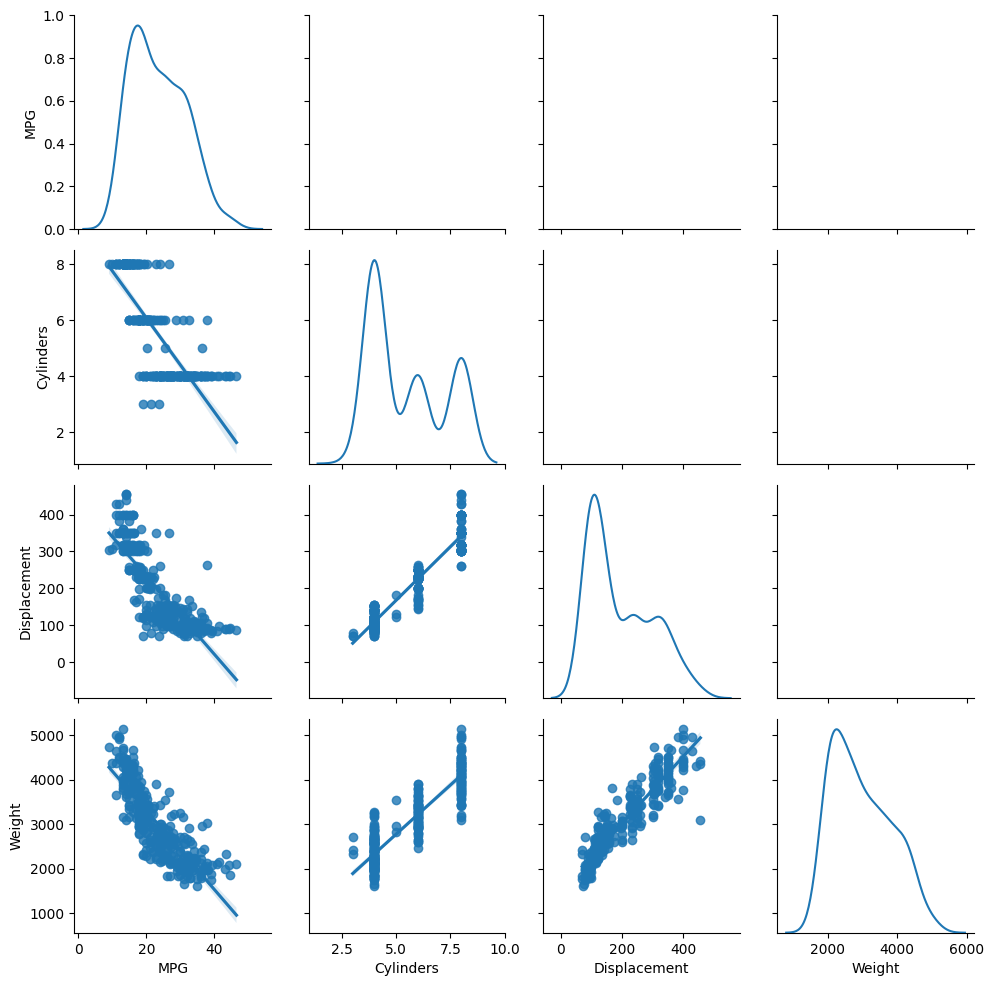

In [39]:
g = sns.axisgrid.PairGrid(training_set, vars=['MPG', 'Cylinders', 'Displacement', 'Weight'], diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)

### 7 - Afficher les statistiques globales.

In [40]:
stats = training_set.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.00,23.60,7.96,9.00,17.00,23.00,30.00,46.60
Cylinders,313.00,5.48,1.70,3.00,4.00,4.00,8.00,8.00
Displacement,313.00,195.52,103.77,70.00,105.00,151.00,302.00,455.00
Horsepower,313.00,104.59,38.28,46.00,76.00,95.00,129.00,230.00
Weight,313.00,2986.12,841.13,1613.00,2234.00,2855.00,3645.00,5140.00
Acceleration,313.00,15.54,2.82,8.00,13.50,15.50,17.30,24.80
Model Year,313.00,76.21,3.63,70.00,73.00,76.00,79.00,82.00
Europe,313.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
Japan,313.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
USA,313.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


 Dans le tableau des statistiques, il est facile de voir à quel point les plages de chaque fonctionnalité sont différentes :

In [41]:
stats[['mean', 'std']]

,mean,std
MPG,23.60,7.96
Cylinders,5.48,1.70
Displacement,195.52,103.77
Horsepower,104.59,38.28
Weight,2986.12,841.13
Acceleration,15.54,2.82
Model Year,76.21,3.63
Europe,0.15,0.36
Japan,0.20,0.40
USA,0.65,0.48


### 8 - Normaliser les données 

In [42]:
training_set_norm = training_set.copy()

for column in training_set.columns:
  if column not in ['Europe', 'Japan', 'USA']:
    training_set_norm[column] = (training_set[column] - stats['mean'][column]) / stats['std'][column]

In [43]:
training_set_norm

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
260,-0.63,0.30,0.28,0.14,0.75,1.12,0.49,0,0,1
184,0.18,-0.87,-0.54,-0.33,-0.49,-0.23,-0.06,0,0,1
174,-0.70,0.30,-0.24,-0.20,-0.00,-0.37,-0.33,0,0,1
64,-1.08,1.48,1.18,1.19,1.37,-0.73,-1.16,0,0,1
344,1.94,-0.87,-1.06,-1.06,-1.32,0.30,1.32,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,-1.08,1.48,1.05,1.19,1.08,-1.08,-1.16,0,0,1
107,-0.70,0.30,0.35,-0.12,-0.23,-0.19,-0.88,0,0,1
272,0.03,-0.87,-0.43,-0.51,-0.16,0.73,0.49,0,0,1
352,0.79,-0.87,-0.94,-1.03,-0.72,1.83,1.32,0,0,1


### 9 - Afficher la matrice de corrélation

<AxesSubplot: >

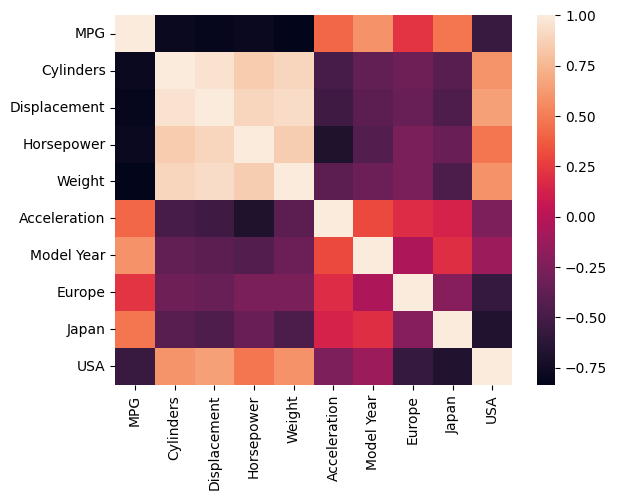

In [44]:
sns.heatmap(training_set_norm.corr(), annot=False)

### 11 - Checker si on peut applique la régression linéaire
regarder support de cours 3

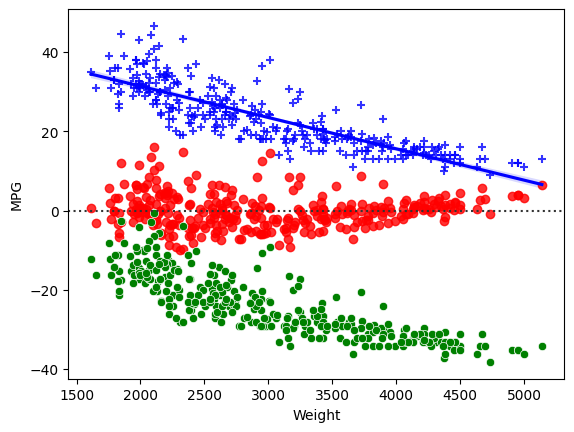

C:\Users\qvngu\AppData\Local\Temp\ipykernel_32096\4020829837.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm)


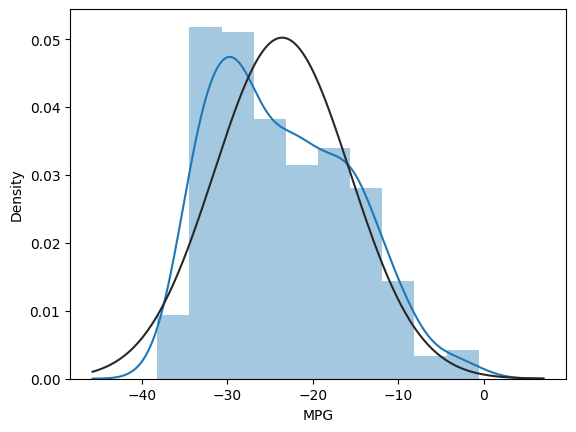

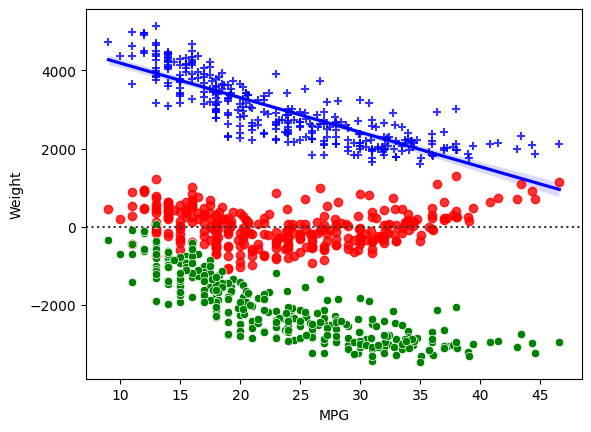

C:\Users\qvngu\AppData\Local\Temp\ipykernel_32096\4020829837.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm)


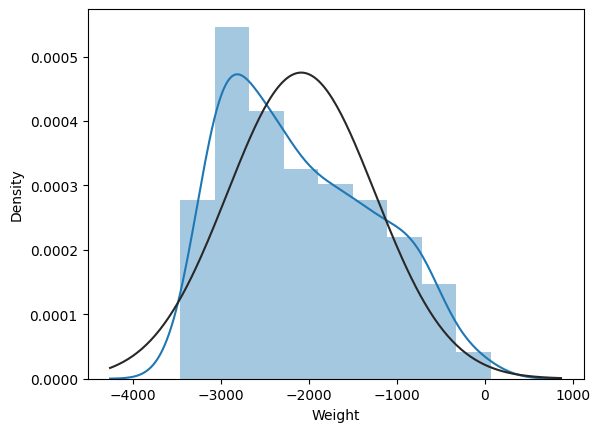

In [45]:
from scipy import stats
x = 'Weight'
y = 'MPG'
sns.regplot(x=x, y=y, data=training_set, color='blue', marker='+')
sns.residplot(x=x, y=y, data=training_set, color='red')
residuals = training_set[y] - stats.linregress(training_set[x], training_set[y])[1]
sns.scatterplot(x=x, y=residuals, data=training_set, color='green')
plt.show()
sns.distplot(residuals, fit=stats.norm)
plt.show()
x,y=y,x
sns.regplot(x=x, y=y, data=training_set, color='blue', marker='+')
sns.residplot(x=x, y=y, data=training_set, color='red')
residuals = training_set[y] - stats.linregress(training_set[x], training_set[y])[1]
sns.scatterplot(x=x, y=residuals, data=training_set, color='green')
plt.show()
sns.distplot(residuals, fit=stats.norm)
plt.show()


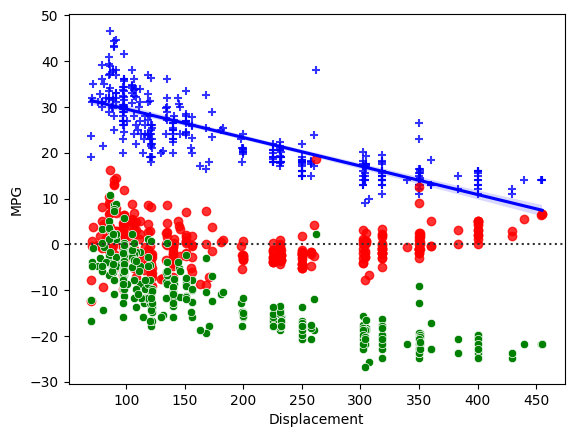

C:\Users\qvngu\AppData\Local\Temp\ipykernel_32096\3157016692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm)


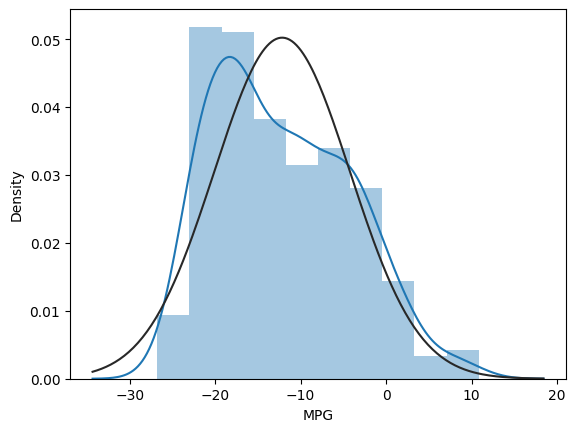

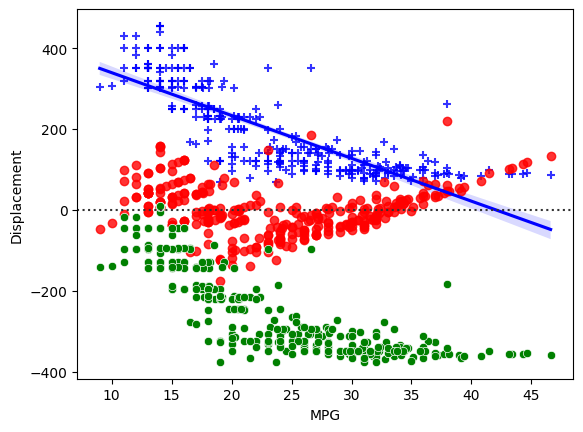

C:\Users\qvngu\AppData\Local\Temp\ipykernel_32096\3157016692.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm)


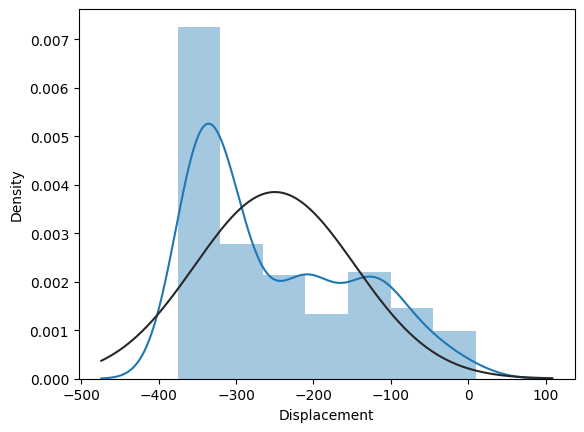

In [46]:
x = 'Displacement'
y = 'MPG'
sns.regplot(x=x, y=y, data=training_set, color='blue', marker='+')
sns.residplot(x=x, y=y, data=training_set, color='red')
residuals = training_set[y] - stats.linregress(training_set[x], training_set[y])[1]
sns.scatterplot(x=x, y=residuals, data=training_set, color='green')
plt.show()
sns.distplot(residuals, fit=stats.norm)
plt.show()
x,y=y,x
sns.regplot(x=x, y=y, data=training_set, color='blue', marker='+')
sns.residplot(x=x, y=y, data=training_set, color='red')
residuals = training_set[y] - stats.linregress(training_set[x], training_set[y])[1]
sns.scatterplot(x=x, y=residuals, data=training_set, color='green')
plt.show()
sns.distplot(residuals, fit=stats.norm)
plt.show()

### 12 - Entraînez le modèle

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
X = training_set[['Cylinders', 'Displacement', 'Horsepower', 'Weight']]
y = training_set['MPG']
regr.fit(X, y)

print('Coefficient :', regr.coef_)
print('Intercept :', regr.intercept_)
print('R2 :', r2_score(y, regr.predict(X)))


Coefficient : [-0.17183061 -0.00622448 -0.04362566 -0.00518117]
Intercept : 45.7930325924431
R2 : 0.7164697448162125


### 11 - Afficher l'erreur

In [54]:
print('MSE :', mean_squared_error(y, regr.predict(X)))

MSE : 17.890686518536885
R2 : 0.7164697448162125
